## Loyalty members clustering

In [1]:
from datetime import datetime
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('Training Data Set.csv')

In [3]:
df.tail(3)

,balance,tier,aag_yr1,cardholder,email_subscriber,enrollment_date,nonflt_use,awd_use,most_recent_flt,most_recent_awd,flt_segs_12mo,flt_segs_6mo,flt_segs_3mo,nonflt_earn_12mo,nonflt_earn_6mo,nonflt_earn_3mo,lifetime_aag_base_miles,affinity_spend_12mo,affinity_spend_6mo,affinity_spend_3mo,flt_base_12mo,flt_base_6mo,flt_base_3mo,flt_promo_12mo,flt_promo_6mo,flt_promo_3mo,ptnr_miles_earned_12mo,ptnr_miles_earned_6mo,ptnr_miles_earned_3mo,ptnr_miles_redeemed_12mo,ptnr_miles_redeemed_6mo,ptnr_miles_redeemed_3mo,partner_offer_opt_in,estatement_opt_in,target,ID
499922,3219710,Platinum,69052.0,True,True,1993-08-17T04:00:00.000Z,0,0,2019-05-10 00:00:00,2015-08-31 00:00:00,34,18,5,149463,99716,24701,727692,1455.41,964.44,245.51,47561,19040,8527,102463,38536,17357,187735,97344,24701,0,0,0,True,True,0,531021
499923,4211165,Regular,3872.0,True,True,1993-03-31T05:00:00.000Z,0,505000,2018-03-27 00:00:00,2019-03-22 00:00:00,0,0,0,166809,48760,24057,32034,1666.55,486.28,239.69,0,0,0,0,0,0,166809,48760,24057,0,0,0,True,True,0,575985
499924,6202340,Gold,55561.0,True,True,1984-09-12T04:00:00.000Z,0,0,2019-05-06 00:00:00,2009-08-29 00:00:00,68,29,17,243250,116941,80472,1226412,1856.72,938.01,657.84,38534,14369,9499,69588,30800,18761,235749,114440,80472,0,0,0,True,True,0,64434


Develop a behavioral segments based on member flight, miles earned and redemption behavior features.

The features within each segment are highly correlated. For example flt_segs_12mo is highly correlated with flt_segs_6mo and again highly correalted with flt_segs_3mo. So, I will only keep one and I decided to use flt_segs_3mo.

In [4]:
df = df[['enrollment_date', 'most_recent_flt', 'aag_yr1', 'balance', 'lifetime_aag_base_miles', 'flt_base_3mo', 'flt_promo_3mo', 'ptnr_miles_earned_3mo', 'ptnr_miles_redeemed_3mo', 'ID']]

Fill missing "most_recent_flt" date with today's date, assume that that date has not come yet for that member.

In [5]:
df['most_recent_flt'].fillna('2019-10-16', inplace=True)
for i in ['enrollment_date', 'most_recent_flt']:
    df[i] = pd.to_datetime(df[i])
df['enrollment_date'] = df['enrollment_date'].dt.date
df['most_recent_flt'] = df['most_recent_flt'].dt.date

for i in ['enrollment_date', 'most_recent_flt']:
    df[i] = pd.to_datetime(df[i])
    
df['years_since_enrollment'] = ((datetime.strptime('10-17-2019', '%m-%d-%Y') - df['enrollment_date']).dt.days)/365
df['months_since_most_recent_flt'] = ((datetime.strptime('10-17-2019', '%m-%d-%Y') - df['most_recent_flt']).dt.days)/12

In [6]:
df.years_since_enrollment.describe()

count    499925.000000
mean          5.878132
std           7.075616
min           0.465753
25%           1.723288
50%           2.827397
75%           6.736986
max         106.835616
Name: years_since_enrollment, dtype: float64

Amazing, two members have been enrolled for over 100 years.

In [7]:
df.loc[df['years_since_enrollment'] > 100]

,enrollment_date,most_recent_flt,aag_yr1,balance,lifetime_aag_base_miles,flt_base_3mo,flt_promo_3mo,ptnr_miles_earned_3mo,ptnr_miles_redeemed_3mo,ID,years_since_enrollment,months_since_most_recent_flt
26659,1917-03-02,2019-10-16,0.0,0,0,0,0,0,0,119762,102.695890,0.083333
450940,1913-01-11,2015-01-27,0.0,21850,500,0,0,800,0,64378,106.835616,143.666667


In [8]:
df['aag_yr1'].fillna(0, inplace=True)
df.drop(['enrollment_date', 'most_recent_flt'], axis=1, inplace=True)
df.drop('ID', axis=1, inplace=True)

In [9]:
pd.options.display.float_format = '{:.2f}'.format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
aag_yr1,499925.00,3121.02,7031.48,0.00,0.00,0.00,3912.00,185331.00
balance,499925.00,29389.24,77897.16,-5627.00,1671.00,8501.00,28551.00,9001052.00
lifetime_aag_base_miles,499925.00,21690.83,61924.44,0.00,0.00,4106.00,16374.00,2254169.00
flt_base_3mo,499925.00,742.32,2193.51,0.00,0.00,0.00,0.00,70987.00
flt_promo_3mo,499925.00,292.21,2176.72,0.00,0.00,0.00,0.00,188444.00
ptnr_miles_earned_3mo,499925.00,1818.77,7719.29,0.00,0.00,0.00,0.00,717139.00
ptnr_miles_redeemed_3mo,499925.00,488.88,7744.96,0.00,0.00,0.00,0.00,1020000.00
years_since_enrollment,499925.00,5.88,7.08,0.47,1.72,2.83,6.74,106.84
months_since_most_recent_flt,499925.00,34.23,48.94,0.08,0.08,21.17,42.92,476.17


From the summary statistics, we can see that most of the members do not have activities, means they are not actively collecting or redeem points. So, all the features are extremely right skewed.

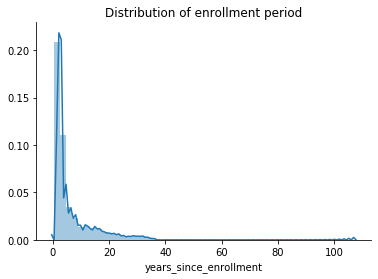

In [11]:
sns.distplot(df['years_since_enrollment'])
plt.title('Distribution of enrollment period')
sns.despine();

Very few members have enrolled for over 40 years, and majority of the members have enrolled for less than 10 years.

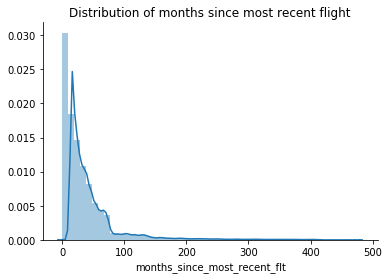

In [12]:
sns.distplot(df['months_since_most_recent_flt'])
plt.title('Distribution of months since most recent flight')
sns.despine();

Most of the members have taken a flight within the past 4 years or so.

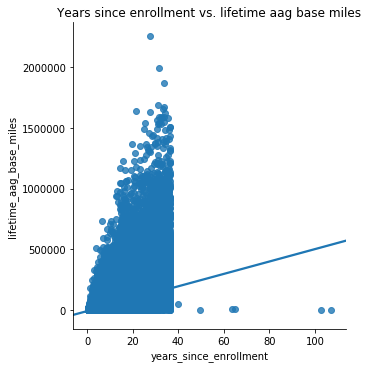

In [20]:
sns.lmplot(x='years_since_enrollment',y='lifetime_aag_base_miles', data=df)
plt.title('Years since enrollment vs. lifetime aag base miles');

Members who have the most lifetime aag base miles are not the ones who have enrolled the longest. They are those who enrolled approximately less than 30 years.

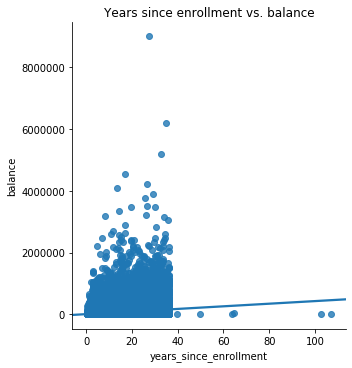

In [21]:
sns.lmplot(x='years_since_enrollment',y='balance', data=df)
plt.title('Years since enrollment vs. balance');

Similar with the above discovery. Members who enrolled the longest are not the ones with the most balance. Members that have the most balance have enrolled for approx 30 years.

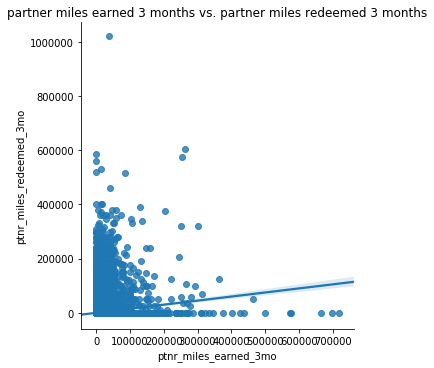

In [22]:
sns.lmplot(x='ptnr_miles_earned_3mo', y='ptnr_miles_redeemed_3mo', data=df)
plt.title('partner miles earned 3 months vs. partner miles redeemed 3 months');

"Earn more, redeem more" does not always hold true, at least not in the same time period. Member who redeemed the most in 3 months did not earn most in 3 months. Probably he earned all those points in the past?

#### Check a few outliers

The following is the member who redeemed the most in the past 3 months but did not earn that much in the same time period. And his (or her) most recent flight was over 15 months ago. So I am interested to know what are those partner miles thing?

In [14]:
df.loc[df['ptnr_miles_redeemed_3mo'] > 1000000]

,aag_yr1,balance,lifetime_aag_base_miles,flt_base_3mo,flt_promo_3mo,ptnr_miles_earned_3mo,ptnr_miles_redeemed_3mo,years_since_enrollment,months_since_most_recent_flt
497642,75905.00,267248,647248,20453,29633,39040,1020000,30.10,15.25


On the other hand, member who earned the most in 3 months did not redeem at all in the same time period. 

In [15]:
df.loc[df['ptnr_miles_earned_3mo'] > 700000]

,aag_yr1,balance,lifetime_aag_base_miles,flt_base_3mo,flt_promo_3mo,ptnr_miles_earned_3mo,ptnr_miles_redeemed_3mo,years_since_enrollment,months_since_most_recent_flt
499882,35479.00,1531093,533207,12901,28787,717139,0,36.28,14.67


Member who has the most balance overall does not seem to be active, is he (or she) aware of this?

In [19]:
df.loc[df['balance'] > 8000000]

,aag_yr1,balance,lifetime_aag_base_miles,flt_base_3mo,flt_promo_3mo,ptnr_miles_earned_3mo,ptnr_miles_redeemed_3mo,years_since_enrollment,months_since_most_recent_flt
359552,0.00,9001052,104807,0,0,18253,0,27.58,170.83


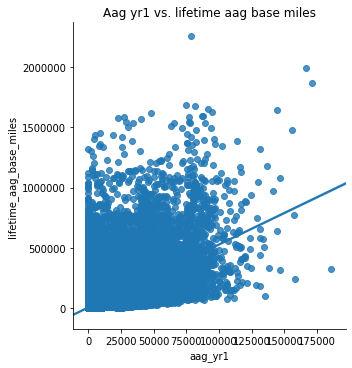

In [23]:
sns.lmplot(x='aag_yr1',y='lifetime_aag_base_miles', data=df)
plt.title('Aag yr1 vs. lifetime aag base miles');

aag_yr1 and lifetime aag base miles are somewhat positive correlated. This makes sense.

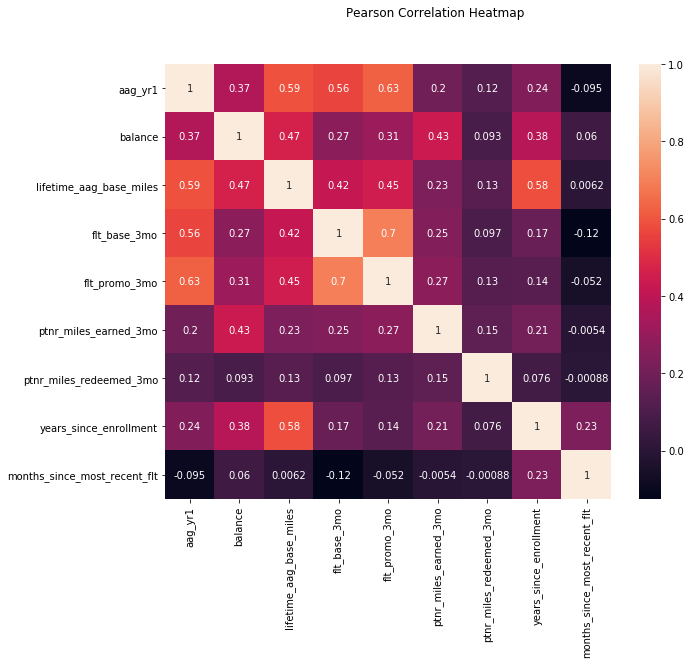

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.suptitle("Pearson Correlation Heatmap")
plt.show();

We can see that these attributes do not have very high correlation among them.

## KMeans Clustering 

Let's assume marketing department wants to launch a buy miles campaign like this: 

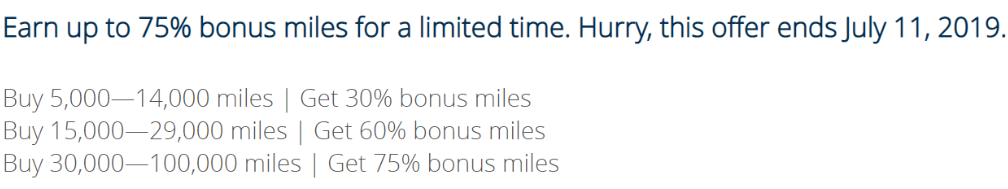

We need to develop a member segmentation to help them better targeting. 

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

### Method 1, Clustering members based on partner miles earned 3 months and partner miles redeemed 3 months.

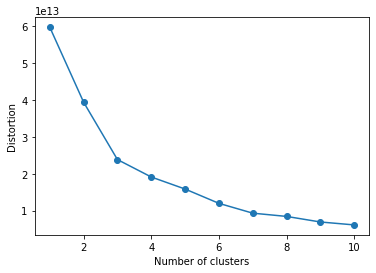

In [24]:
x = df.iloc[:, [5, 6]].values

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show();

The elbow is located either k=6 or k=7. I will go with k=7.

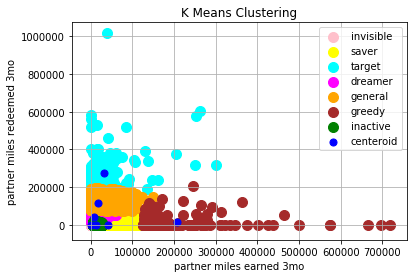

In [25]:
km = KMeans(n_clusters = 7, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'invisible')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'saver')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'dreamer')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'general')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 100, c = 'brown', label = 'greedy')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 100, c = 'green', label = 'inactive')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('partner miles earned 3mo')
plt.ylabel('partner miles redeemed 3mo')
plt.legend()
plt.grid()
plt.show();

I gave name to each cluster in order to distinguish them as intuitive as possible. 

The reason I think the cluster "target" could be a good campaign target is that, they have redeemed significant amount of miles recently while having not earned equivalent amount of miles in the same time period. I think some of them may look forward to receive any kind of buy miles promotion.

Summary statistics for the target cluster, and there are 174 members in this cluster.

In [26]:
ptnr_miles_earned_3mo = x[y_means == 2, 0]
ptnr_miles_redeemed_3mo = x[y_means == 2, 1] 
pd.DataFrame({'ptnr_miles_earned_3mo': ptnr_miles_earned_3mo, 'ptnr_miles_redeemed_3mo': list(ptnr_miles_redeemed_3mo)}, columns=['ptnr_miles_earned_3mo', 'ptnr_miles_redeemed_3mo']).describe()

,ptnr_miles_earned_3mo,ptnr_miles_redeemed_3mo
count,174.00,174.00
mean,32550.64,273842.53
std,48740.66,97858.28
min,0.00,192500.00
25%,4958.75,220000.00
50%,16602.00,240000.00
75%,40566.50,300000.00
max,300000.00,1020000.00


### Method 2, Clustering members based on balance and flight promo 3 months. 

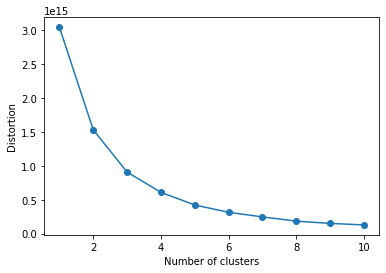

In [27]:
x = df.iloc[:, [1, 4]].values
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show();

This time I go with k=6.

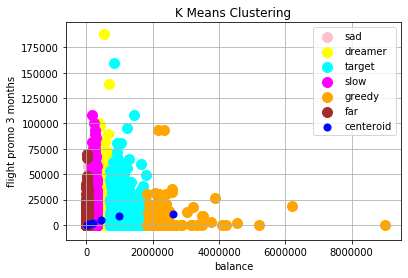

In [28]:
km = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'sad')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'dreamer')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'slow')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'greedy')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 100, c = 'brown', label = 'far')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('balance')
plt.ylabel('flight promo 3 months')
plt.legend()
plt.grid()
plt.show();

The reason I think cluster "target" can be a potential target for this campaign is that they have some points but may not enough for a dream trip, and some of them have earned points by promotion recently, seems thay are inclined to promotions. “Stuck in the Middle: The Psychophysics of Goal Pursuit”? They are not too far to accomplish their goals. I think they have the tendency to buy miles if the deal sounds attractive.

Summary statistics for target cluster. And there are 838 members in this cluster.

In [29]:
balance = x[y_means == 2, 0]
flt_pro_3mo = x[y_means == 2, 1]
pd.DataFrame({'balance': balance, 'flt_pro_3mo': list(flt_pro_3mo)}, columns=['balance', 'flt_pro_3mo']).describe()

,balance,flt_pro_3mo
count,838.00,838.00
mean,992630.70,9097.18
std,252921.17,14759.11
min,718497.00,0.00
25%,797307.50,0.00
50%,914990.50,2542.50
75%,1109698.75,13126.75
max,1801951.00,159430.00


### Method 3, Clustering members based on balance and partner miles redeemed 3 months.

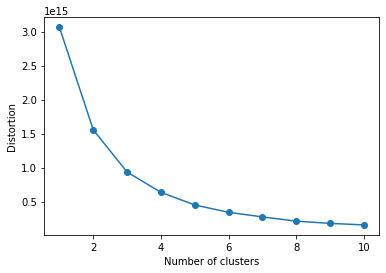

In [30]:
x = df.iloc[:, [1, 6]].values
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show();

k=5 this time.

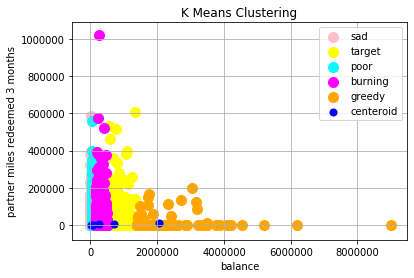

In [31]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'sad')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'target')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'poor')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'burning')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'greedy')
#plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 100, c = 'brown', label = 'greedy')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('balance')
plt.ylabel('partner miles redeemed 3 months')
plt.legend()
plt.grid()
plt.show();

Again, the reason I think the cluster target could be a good target is that they do have some points, and most of them have not redeemed recently, they maybe pursue a vacation goal, maybe a little short for a vacation they desire. They may need a little push.

Summary statiatics for this target cluster, and there are 1,972 members in this cluster.

In [32]:
balance = x[y_means == 1, 0]
partner_miles_redeemed_3mo = x[y_means == 1, 1]
pd.DataFrame({'balance': balance, 'partner_miles_redeemed_3mo': list(partner_miles_redeemed_3mo)}, columns=['balance', 'partner_miles_redeemed_3mo']).describe()

,balance,partner_miles_redeemed_3mo
count,1972.00,1972.00
mean,713676.88,7682.56
std,202454.23,41036.54
min,490402.00,0.00
25%,551870.50,0.00
50%,653472.00,0.00
75%,822299.25,0.00
max,1380329.00,605000.00
